# Clustering Implementation - Mall Customers Segmentation

Linkedin: https://www.linkedin.com/in/satya-nerurkar-9b0655190/<br>
Github: https://github.com/SatyaNerurkar

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score,davies_bouldin_score

from scipy.cluster.hierarchy import dendrogram

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Data Ingestion

In [2]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/NelakurthiSudheer/Mall-Customers-Segmentation/main/Dataset/Mall_Customers.csv")

In [3]:
print(f"This dataset contains {raw_df.shape[0]} rows and {raw_df.shape[1]} columns")

This dataset contains 200 rows and 5 columns


In [4]:
df=raw_df.copy()

### Profile of the Data

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
df.describe(include='object').T

,count,unique,top,freq
Gender,200,2,Female,112


### Exploratory Data Analysis

In [5]:
from pandas_profiling import ProfileReport

# EDA using pandas-profiling
profile = ProfileReport(df, explorative=True)

# Displaying report in notebook cell.
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

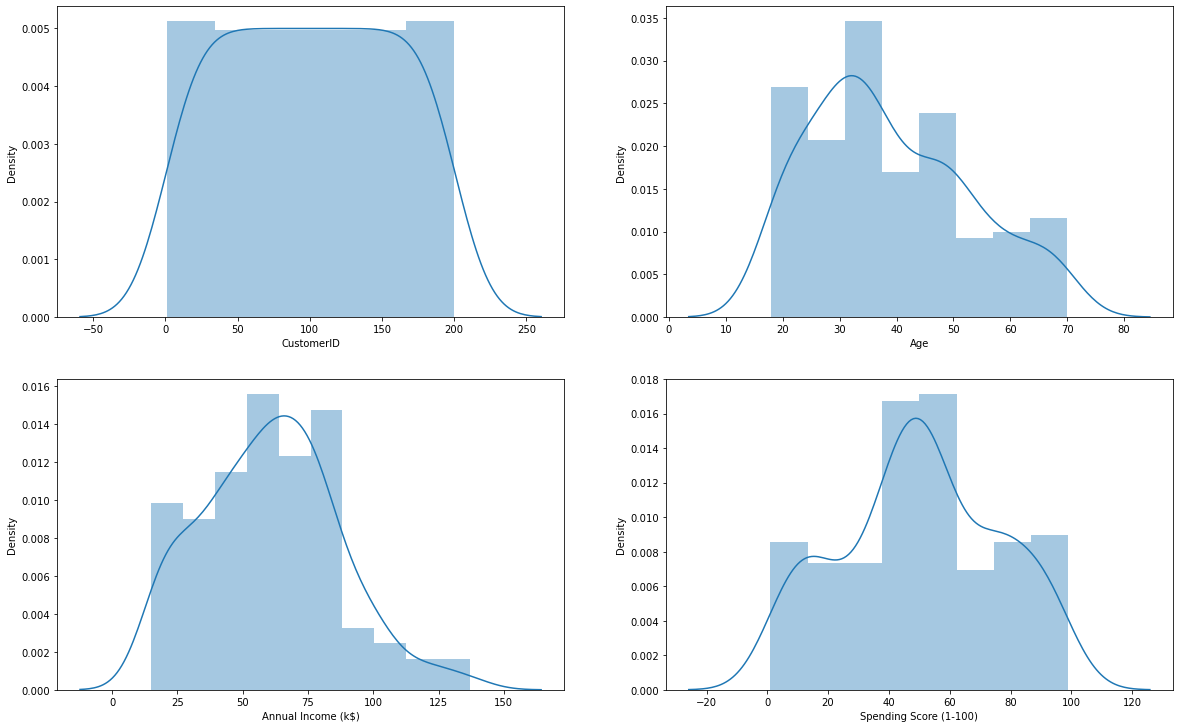

In [7]:
cols = ['CustomerID','Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(20,40), facecolor='white')

for i in range(0, len(cols)):
    plt.subplot(6, 2, i+1)
    sns.distplot(x=df[cols[i]],kde=True)
    plt.xlabel(cols[i])

In [10]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [11]:
df.Gender.replace(('Male', 'Female'),(0,1), inplace=True)

In [12]:
k_df=df.iloc[:,-2:]

In [13]:
k_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### K-Means

In [14]:
# Experimenting with different k values

wcss=[]
l1 = list(np.arange(1,30))

for i in l1:
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=40)
    kmeans.fit(k_df)
    wcss.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow curve')

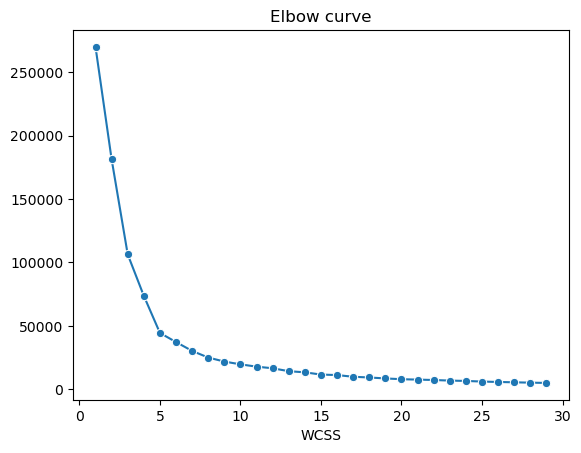

In [15]:
sns.lineplot(x=l1, y=wcss,marker='o')
plt.xlabel('number of clusters')
plt.xlabel('WCSS')
plt.title("Elbow curve")

In [16]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=40)

In [17]:
kmeans.fit(k_df)

KMeans(n_clusters=5, random_state=40)

In [18]:
kmeans.predict(k_df)

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [19]:
labels=kmeans.labels_

In [20]:
kmeans.cluster_centers_

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [25.72727273, 79.36363636]])

In [21]:
kmeans.inertia_

44448.455447933724

In [22]:
print(f"Silhouette score is {silhouette_score(k_df,labels)}")
print(f"Davies Bouldin score {davies_bouldin_score(k_df,labels)}")

Silhouette score is 0.553931997444648
Davies Bouldin score 0.5725628995597081


In [23]:
k_df["KMeans_label"] = labels

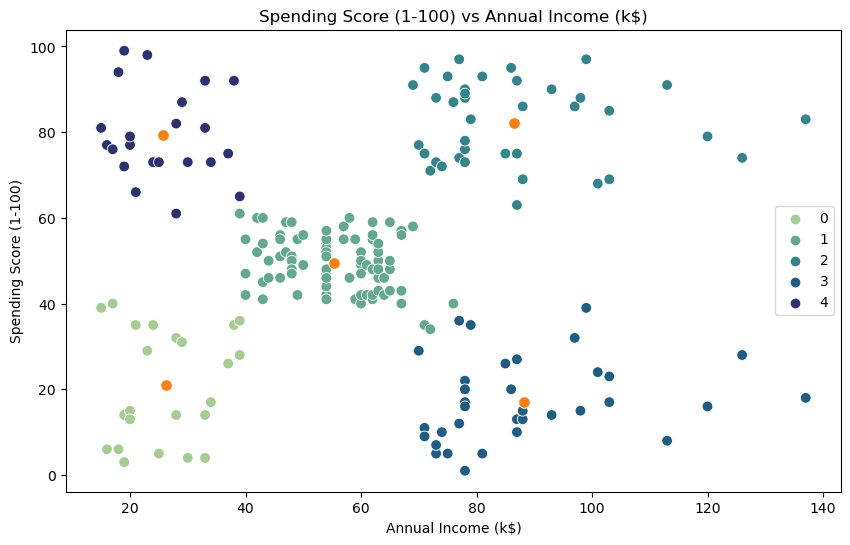

In [24]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="KMeans_label",  
                 palette='crest', legend='full',data = k_df  ,s = 60 )
sns.scatterplot(x = kmeans.cluster_centers_[:,0],y = kmeans.cluster_centers_[:,1], s=70 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()


### Agglomerative clustering

In [25]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [26]:
agc_df = df.iloc[:,-2:]

In [27]:
# setting distance_threshold=0 ensures we compute the full tree.
Agglomerative_Clustering_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [28]:
model = Agglomerative_Clustering_model.fit(agc_df)

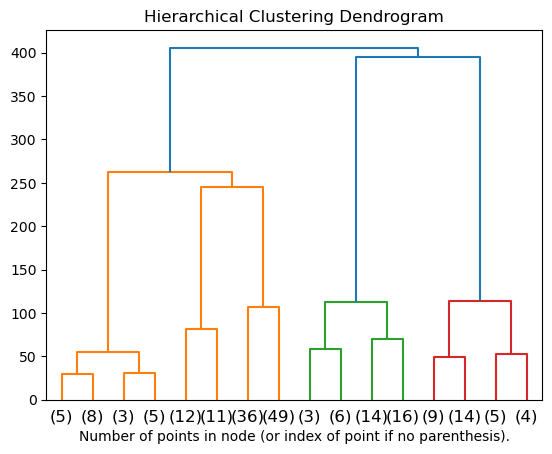

In [29]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(Agglomerative_Clustering_model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### DBSCAN

In [30]:
dbscan_df = df.iloc[:,-2:]

In [31]:
DBSCAN_clustering_models = DBSCAN(eps=9, min_samples=2).fit(dbscan_df)

In [32]:
print(f"Silhouette score is {silhouette_score(dbscan_df,DBSCAN_clustering_models.labels_)}")
print(f"Davies Bouldin score {davies_bouldin_score(dbscan_df,DBSCAN_clustering_models.labels_)}")

Silhouette score is 0.4437895954843984
Davies Bouldin score 0.941762705322535


In [33]:
dbscan_df["DBSCAN_label"] = DBSCAN_clustering_models.labels_

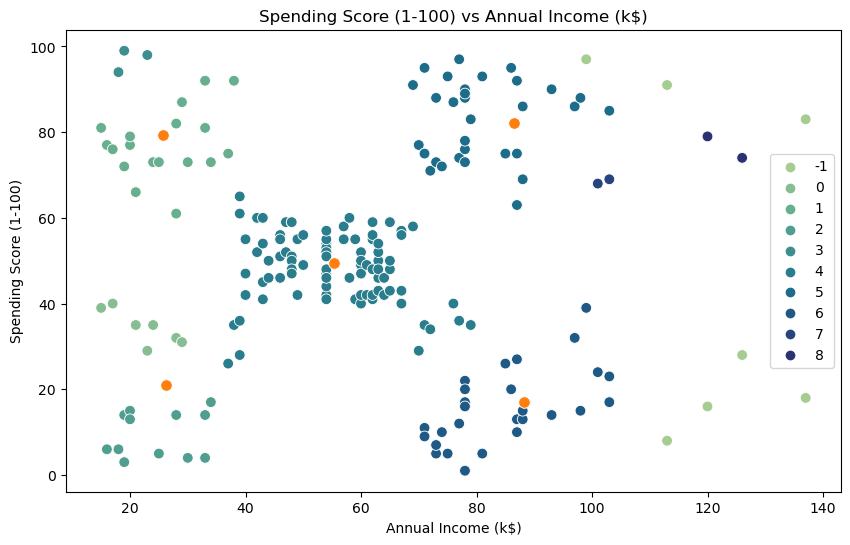

In [34]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="DBSCAN_label",  
                 palette='crest', legend='full',data = dbscan_df  ,s = 60 )
sns.scatterplot(x = kmeans.cluster_centers_[:,0],y = kmeans.cluster_centers_[:,1], s=70 )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

# Thank You!